# ** IRIS **

## 1. Importe les bibliothèques adequoites.

In [2080]:
#Import library

# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import preprocessing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split #training and testing data split

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier  #KNN
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import preprocessing
from IPython.display import clear_output
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.metrics import confusion_matrix #for confusion matrix
import sklearn.feature_extraction as feature_extraction
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import Ridge
from matplotlib.patches import Patch
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
grid = GridSearchCV(LinearSVC(), param_grid={'C': [1, 10]}, scoring=ftwo_scorer)
from sklearn.svm import SVC
from sklearn.utils import shuffle
%matplotlib inline

## 2. Importe les données

In [2081]:
#lecture des données
iris = pd.read_csv('Iris.csv')
print(iris)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [2082]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2083]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [2084]:
iris.shape

(150, 6)

In [2085]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [2086]:
print("\nColumn Names:\n") 
print(iris.columns)


Column Names:

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [2087]:

iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

EDA

<AxesSubplot: >

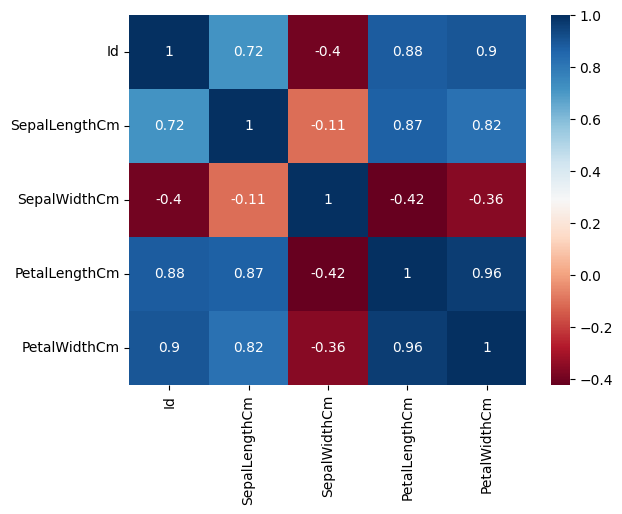

In [2088]:
#Tout d'abord, regardez la corrélation
#Afficher un tracé de carte thermique

sns.heatmap(iris.corr(), cbar=True, annot=True, cmap='RdBu')

Conclusion

<font color = 'grey'> on remarque une forte correlation. la max est entre petallenghcm``0.96`` et petalwidthcm``0.96``. La minimum et entre sepalwidthcm ``-0.42`` et petallenghthcm ``0.42``.</font>

DISTRIBUTION

In [2089]:
iris_num = iris.select_dtypes(include = [ 'int64'])
"""Transforme les données en float et int"""
iris_num.sum()

Id    11325
dtype: int64

In [2090]:
pd.crosstab(iris.Species,iris.PetalWidthCm,margins=True).style.background_gradient(cmap='summer_r')

PetalWidthCm,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,1.000000,1.100000,1.200000,1.300000,1.400000,1.500000,1.600000,1.700000,1.800000,1.900000,2.000000,2.100000,2.200000,2.300000,2.400000,2.500000,All
Species,,,,,,,,,,,,,,,,,,,,,,,
Iris-setosa,6,28,7,7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50
Iris-versicolor,0,0,0,0,0,0,7,3,5,13,7,10,3,1,1,0,0,0,0,0,0,0,50
Iris-virginica,0,0,0,0,0,0,0,0,0,0,1,2,1,1,11,5,6,6,3,8,3,3,50
All,6,28,7,7,1,1,7,3,5,13,8,12,4,2,12,5,6,6,3,8,3,3,150


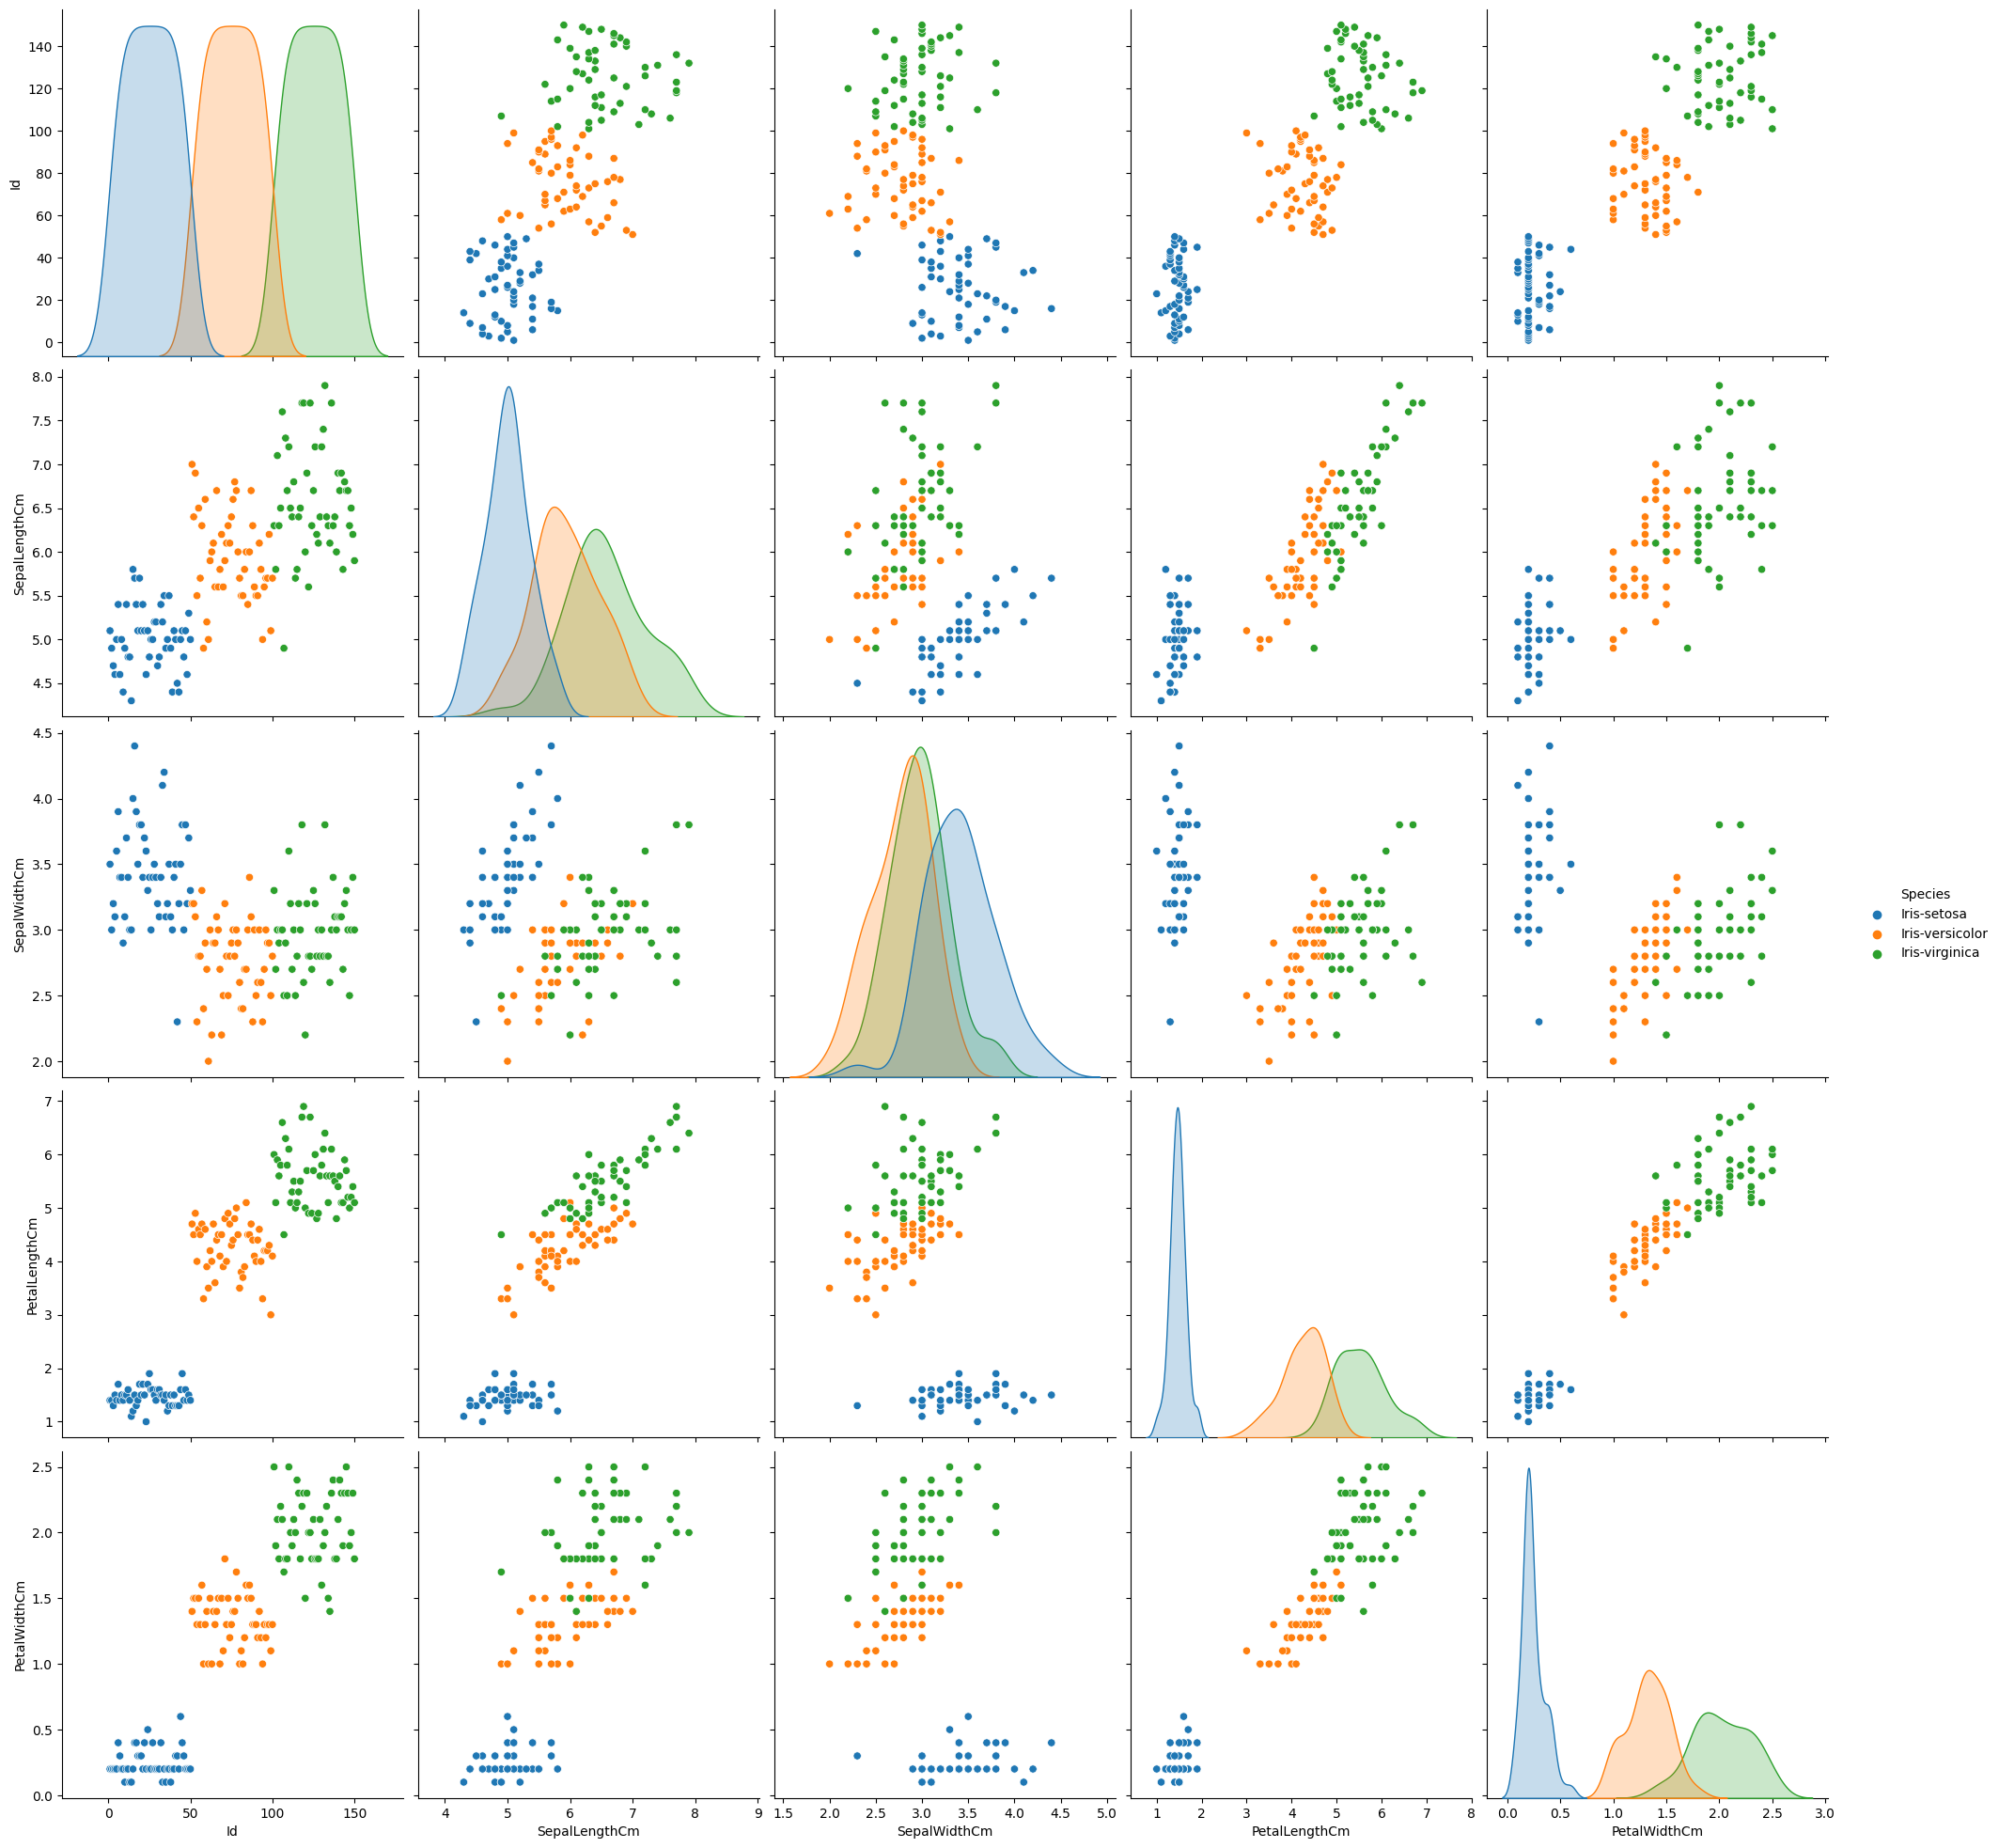

In [2091]:
sns.pairplot(iris, hue = 'Species', height=4 )

Encodage des variables

In [2092]:
def Encoder(iris):
          columnsToEncode = list(iris.select_dtypes(include=['category','object']))
          le = LabelEncoder()
          for feature in columnsToEncode:
              try:
                  iris[feature] = le.fit_transform(iris[feature])
              except:
                  print('Error encoding '+feature)
          return iris

In [2093]:
columnsToEncode = list(iris.select_dtypes(include=['category','object']))

In [2094]:
le = LabelEncoder()

In [2095]:
for feature in columnsToEncode:
              try:
                  iris[feature] = le.fit_transform(iris[feature])
              except:
                  print('Error encoding '+feature)

In [2096]:
iris = Encoder(iris)

In [2097]:
print(iris)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      1            5.1           3.5            1.4           0.2        0
1      2            4.9           3.0            1.4           0.2        0
2      3            4.7           3.2            1.3           0.2        0
3      4            4.6           3.1            1.5           0.2        0
4      5            5.0           3.6            1.4           0.2        0
..   ...            ...           ...            ...           ...      ...
145  146            6.7           3.0            5.2           2.3        2
146  147            6.3           2.5            5.0           1.9        2
147  148            6.5           3.0            5.2           2.0        2
148  149            6.2           3.4            5.4           2.3        2
149  150            5.9           3.0            5.1           1.8        2

[150 rows x 6 columns]


In [2098]:
iris.mean()

Id               75.500000
SepalLengthCm     5.843333
SepalWidthCm      3.054000
PetalLengthCm     3.758667
PetalWidthCm      1.198667
Species           1.000000
dtype: float64

In [2099]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [2100]:
# valeurs de colonne d'espèces sont changées en forme numérique
iris.Species.unique()

array([0, 1, 2])

In [2101]:
#train test split
train, test = train_test_split(iris, test_size = 0.2, random_state = 0)

In [2102]:
print(train.shape)

(120, 6)


In [2103]:
print(test.shape)

(30, 6)


scaler

In [2104]:
scaler = StandardScaler()
scaler.fit(iris)

StandardScaler()

In [2105]:
#on utilise seulement 4 variables explicatives
X =pd.DataFrame(np.c_[iris['SepalLengthCm'], iris['PetalLengthCm'], iris['SepalWidthCm'],iris['PetalWidthCm']], columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
Y = iris['Species'],
print(X.shape)
# #base d'apprentissage et base de test

train,test=train_test_split(iris,test_size=0.3,random_state=0,stratify=iris['Species'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=iris[iris.columns[1:]]
Y=iris['Species']

(150, 4)


In [2106]:
#Séparez la cible et la variable indépendante
train_X = train.drop(columns = ['Species'], axis = 1)
train_Y = train['Species']

test_X = test.drop(columns = ['Species'], axis = 1)
test_Y = test['Species']

In [2107]:
print(test_Y.shape)
print(test_X.shape)

(45,)
(45, 5)


In [2108]:
print(train_X.shape, train_Y.shape)

(105, 5) (105,)


In [2109]:
print(test_X.shape, test_Y.shape)

(45, 5) (45,)


Cross validation

 Cross validation: évaluer les performances des estimateurs

In [2110]:
X.shape, Y.shape

((150, 5), (150,))

In [2111]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.4, random_state=0)

In [2112]:
X_train.shape, y_train.shape

((90, 5), (90,))

In [2113]:
X_test.shape, y_test.shape

((60, 5), (60,))

In [2114]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

 Calcul de métriques à cross validation

In [2115]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
print('Train score:', model.score(X_train, y_train))
print('Test score:', model.score(X_test, y_test))

Train score: 1.0
Test score: 1.0


In [2116]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy').mean()


1.0

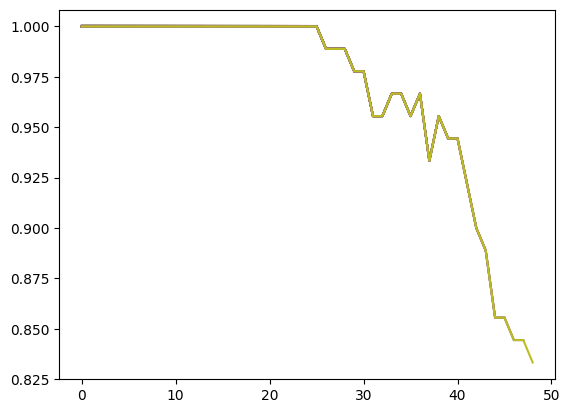

In [2117]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train,cv=5).mean()
    val_score.append(score)

    plt.plot(val_score)

In [2118]:
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, Y, cv=5)
scores

array([1., 1., 1., 1., 1.])

Le score moyen et l'écart type sont donc donnés par

In [2119]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

1.00 accuracy with a standard deviation of 0.00


In [2120]:
scores = cross_val_score(
clf, X, Y, cv=5, scoring='f1_macro')
scores

array([1., 1., 1., 1., 1.])

In [2121]:
def custom_cv_2folds(X):
     n = X.shape[0]
     i = 1
     while i <= 2:
         idx = np.arange(n * (i - 1) / 2, n * i / 2, dtype=int)
         yield idx, idx
         i += 1

custom_cv = custom_cv_2folds(X)
cross_val_score(clf, X, Y, cv=custom_cv)

array([1., 1.])

In [2122]:
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
cross_val_score(clf, X, Y, cv=5)

array([1., 1., 1., 1., 1.])

La fonction cross_validate et l'évaluation de métriques multiples

In [2123]:
scoring = ['precision_macro', 'recall_macro']
clf = svm.SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, X, Y, scoring=scoring)
sorted(scores.keys())
print(scores)


{'fit_time': array([0.01212215, 0.011518  , 0.00531697, 0.00423193, 0.00409293]), 'score_time': array([0.00526476, 0.01140928, 0.0119226 , 0.01168752, 0.01460338]), 'test_precision_macro': array([1., 1., 1., 1., 1.]), 'test_recall_macro': array([1., 1., 1., 1., 1.])}


In [2124]:
scores['test_recall_macro']

array([1., 1., 1., 1., 1.])

In [2125]:
scoring = {'prec_macro': 'precision_macro',
           'rec_macro': make_scorer(recall_score, average='macro')}
scores = cross_validate(clf, X, Y, scoring=scoring,
                        cv=5, return_train_score=True)
sorted(scores.keys())

['fit_time',
 'score_time',
 'test_prec_macro',
 'test_rec_macro',
 'train_prec_macro',
 'train_rec_macro']

In [2126]:
scores['train_rec_macro']

array([1., 1., 1., 1., 1.])

In [2127]:
scores = cross_validate(clf, X, Y,
                        scoring='precision_macro', cv=5,
                        return_estimator=True)
sorted(scores.keys())

['estimator', 'fit_time', 'score_time', 'test_score']

KFOLK

In [2128]:
kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))
    

[ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74] [ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 13

In [2129]:
random_state = 12883823
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
for train, test in rkf.split(X):
    print("%s %s" % (train, test))

[  2   4   5   7   8   9  12  13  14  15  16  18  19  20  27  28  29  30
  31  33  34  36  37  38  40  42  45  46  49  50  51  53  56  59  60  62
  63  68  69  73  74  75  78  80  84  86  87  88  89  91  95  96  97  98
  99 100 102 103 104 105 112 115 116 120 126 129 135 138 139 141 142 143
 144 145 147] [  0   1   3   6  10  11  17  21  22  23  24  25  26  32  35  39  41  43
  44  47  48  52  54  55  57  58  61  64  65  66  67  70  71  72  76  77
  79  81  82  83  85  90  92  93  94 101 106 107 108 109 110 111 113 114
 117 118 119 121 122 123 124 125 127 128 130 131 132 133 134 136 137 140
 146 148 149]
[  0   1   3   6  10  11  17  21  22  23  24  25  26  32  35  39  41  43
  44  47  48  52  54  55  57  58  61  64  65  66  67  70  71  72  76  77
  79  81  82  83  85  90  92  93  94 101 106 107 108 109 110 111 113 114
 117 118 119 121 122 123 124 125 127 128 130 131 132 133 134 136 137 140
 146 148 149] [  2   4   5   7   8   9  12  13  14  15  16  18  19  20  27  28  29  30
  31  33 

In [2130]:
skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(X, Y):
    print('train -  {}   |   test -  {}'.format(
        np.bincount(Y[train]), np.bincount(Y[test])))

train -  [33 33 34]   |   test -  [17 17 16]
train -  [33 34 33]   |   test -  [17 16 17]
train -  [34 33 33]   |   test -  [16 17 17]


LOO= LIVE ONE OUT

In [2131]:
loo = LeaveOneOut()
for train, test in loo.split(X):
    print("%s %s" % (train, test))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149] [0]
[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96 

In [2132]:

ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
for train_index, test_index in ss.split(X):
    print("%s %s" % (train_index, test_index))


[ 61  92 112   2 141  43  10  60 116 144 119 108  69 135  56  80 123 133
 106 146  50 147  85  30 101  94  64  89  91 125  48  13 111  95  20  15
  52   3 149  98   6  68 109  96  12 102 120 104 128  46  11 110 124  41
 148   1 113 139  42   4 129  17  38   5  53 143 105   0  34  28  55  75
  35  23  74  31 118  57 131  65  32 138  14 122  19  29 130  49 136  99
  82  79 115 145  72  77  25  81 140 142  39  58  88  70  87  36  21   9
 103  67 117  47] [114  62  33 107   7 100  40  86  76  71 134  51  73  54  63  37  78  90
  45  16 121  66  24   8 126  22  44  97  93  26 137  84  27 127 132  59
  18  83]
[ 49  62  74  17 106   8 135  80 107  90   0  36 112   5  57 102  55  34
 128  33  21  73   7  45 129 103 146 120  94  50 134  99 126 114   9  39
  97 101  29  81  20  46  51  53  23  27   2  28  37 111  10  84 137 127
  43  87  69 144 140  35  76   3  82 145 116  88  44 147   1  93  38  11
 115  54  40  18  41  79  24  56  71  13  31  85  70 132 125 123 100  32
 104  83 117 118 138  2

validation curve

In [2133]:
train_scores, valid_scores = validation_curve(
    Ridge(), X, Y, param_name="alpha", param_range=np.logspace(0, 3, 3),
    cv=5)
train_scores

array([[0.99836717, 0.99856747, 0.9986175 , 0.99846264, 0.99780396],
       [0.93078572, 0.94782082, 0.96863105, 0.95094941, 0.94702839],
       [0.44629218, 0.52415801, 0.62104597, 0.55127509, 0.52216983]])

Learning curve

In [2134]:
train_sizes, train_scores, valid_scores = learning_curve(
   SVC(kernel='linear'), X, Y, train_sizes=[50, 80, 110], cv=5)
train_sizes


array([ 50,  80, 110])

In [2135]:
train_scores

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

GridSearchCV

In [2136]:
param_grid = {'n_neighbors': np.arange(1, 20),
'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [2137]:
grid.best_score_

1.0

In [2138]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 1}

In [2139]:
model = grid.best_estimator_

Confusion Matrix

In [2140]:
model.score(X_test, y_test)

1.0

In [2141]:
confusion_matrix(y_test, model.predict(X_test))

array([[16,  0,  0],
       [ 0, 23,  0],
       [ 0,  0, 21]])